1. Decision tree classifier and visualize it
2. It should predict right class accurately

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier,plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import scikitplot as skplt

In [2]:
df_iris = pd.read_csv("Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: xlabel='Species', ylabel='count'>

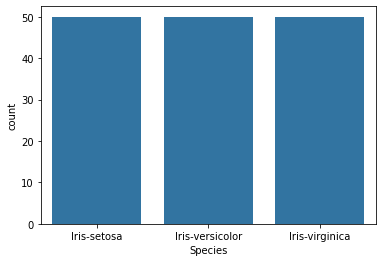

In [4]:
# perfectly balanced classes
sns.countplot(data=df_iris, x='Species')

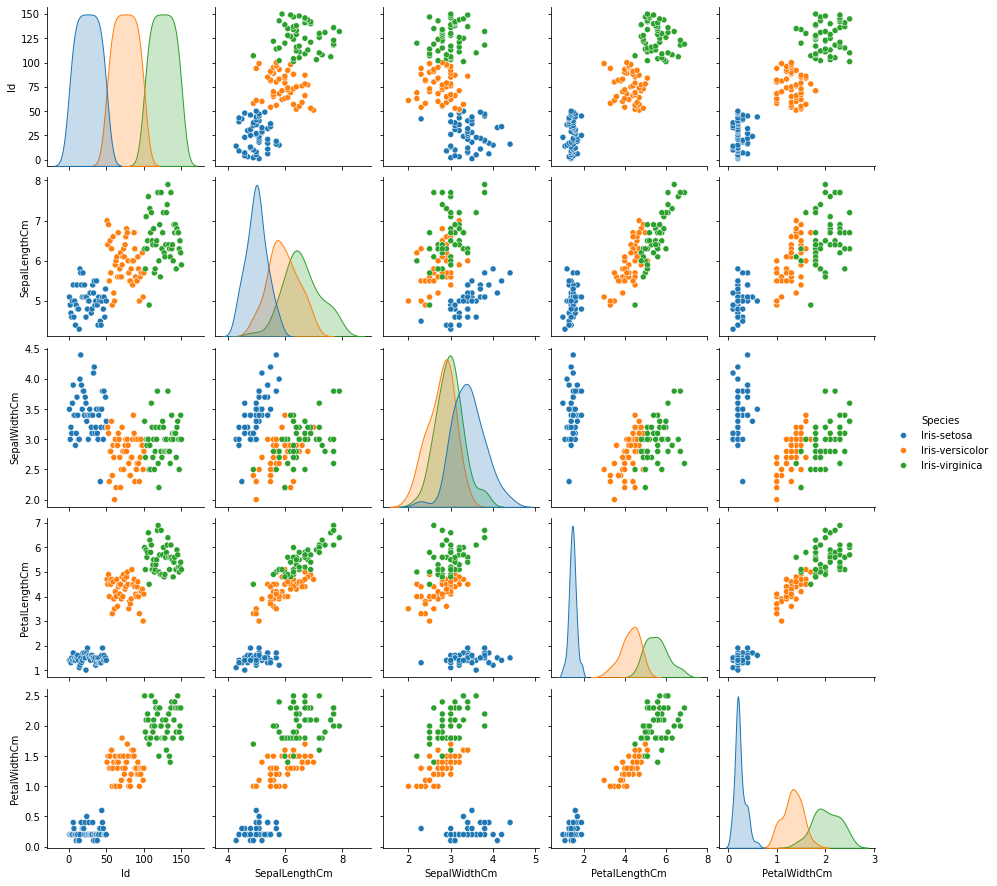

In [5]:
sns.pairplot(df_iris,hue='Species')

<Axes: >

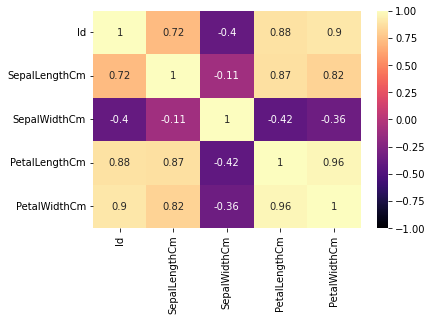

In [6]:
sns.heatmap(df_iris.drop('Species',axis=1).corr(),vmin=-1, vmax=1, annot=True,cmap='magma')

In [7]:
# no nulls
df_iris.isna().sum().sum()

0

In [15]:
def make_pred(y_test,y_pred,y_proba):
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    auc_roc = roc_auc_score(y_test, y_proba,multi_class='ovo')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("AUC-ROC:", auc_roc)
    print("Confusion matrix : \n",confusion_matrix(y_test, y_pred))

    skplt.metrics.plot_roc_curve(y_test, y_proba)
    plt.show()

Results for XGBoost

Precision: 0.98
Recall: 0.98
F1-score: 0.98
AUC-ROC: 1.0
Confusion matrix : 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


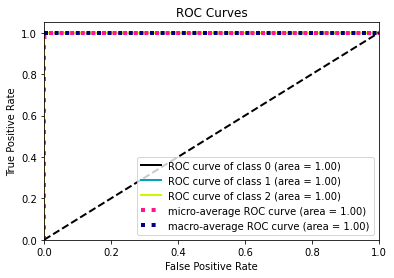

In [16]:
X = df_iris.drop(['Id','Species'],axis=1)
y = df_iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
# Given a test point, predict the right class accordingly
y_pred=xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)
print("Results for XGBoost\n")
make_pred(y_test, y_pred,y_proba)

# Visualizing the Decision Tree 

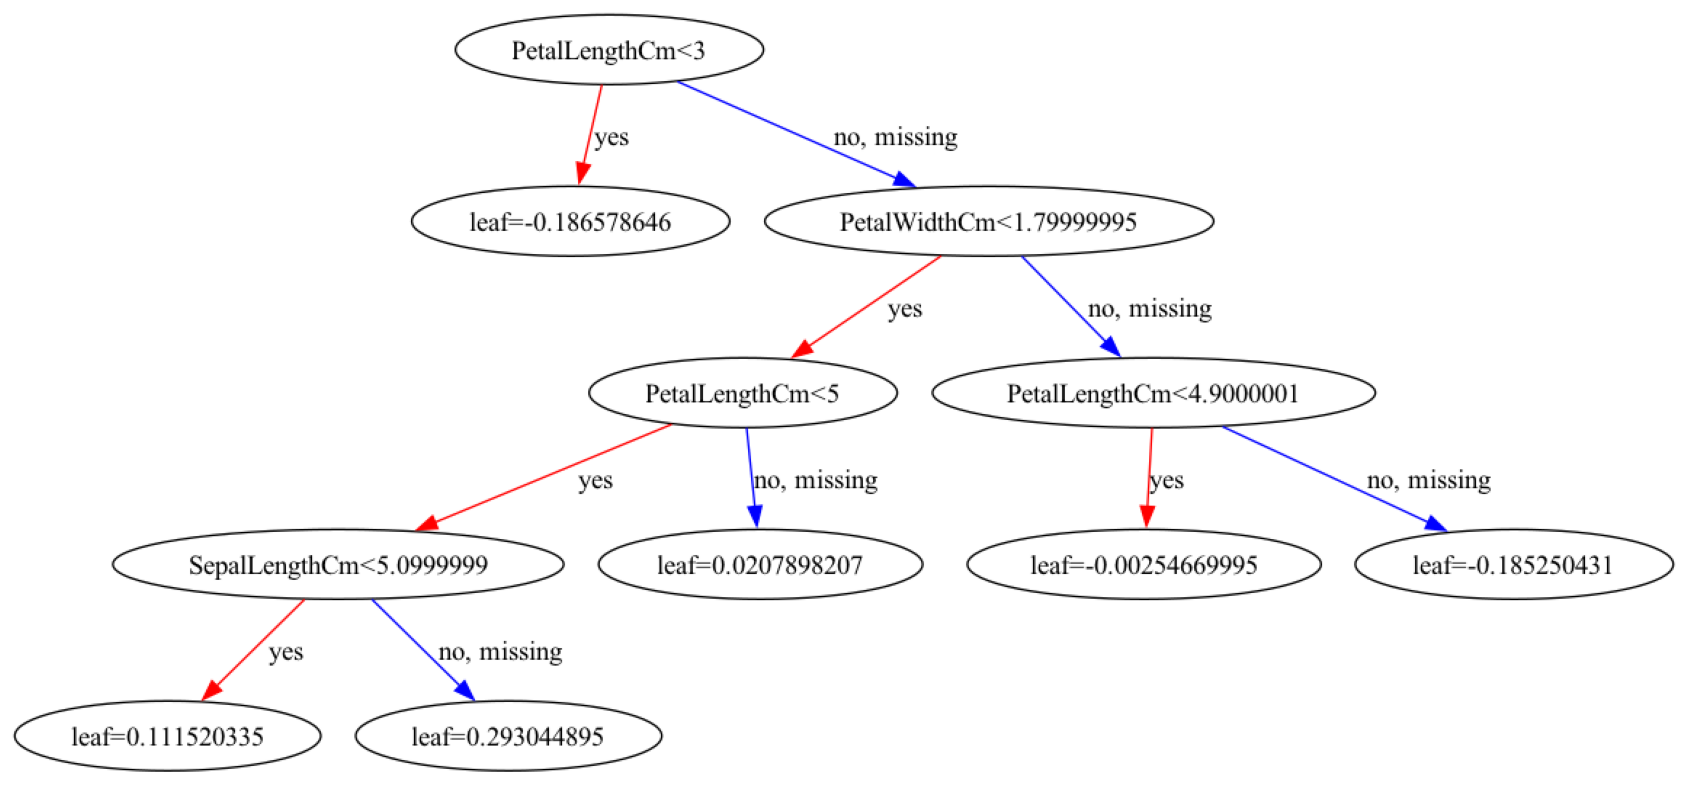

In [ ]:
# Decision tree using xgboost
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb, num_trees=4, ax=ax)
plt.show()

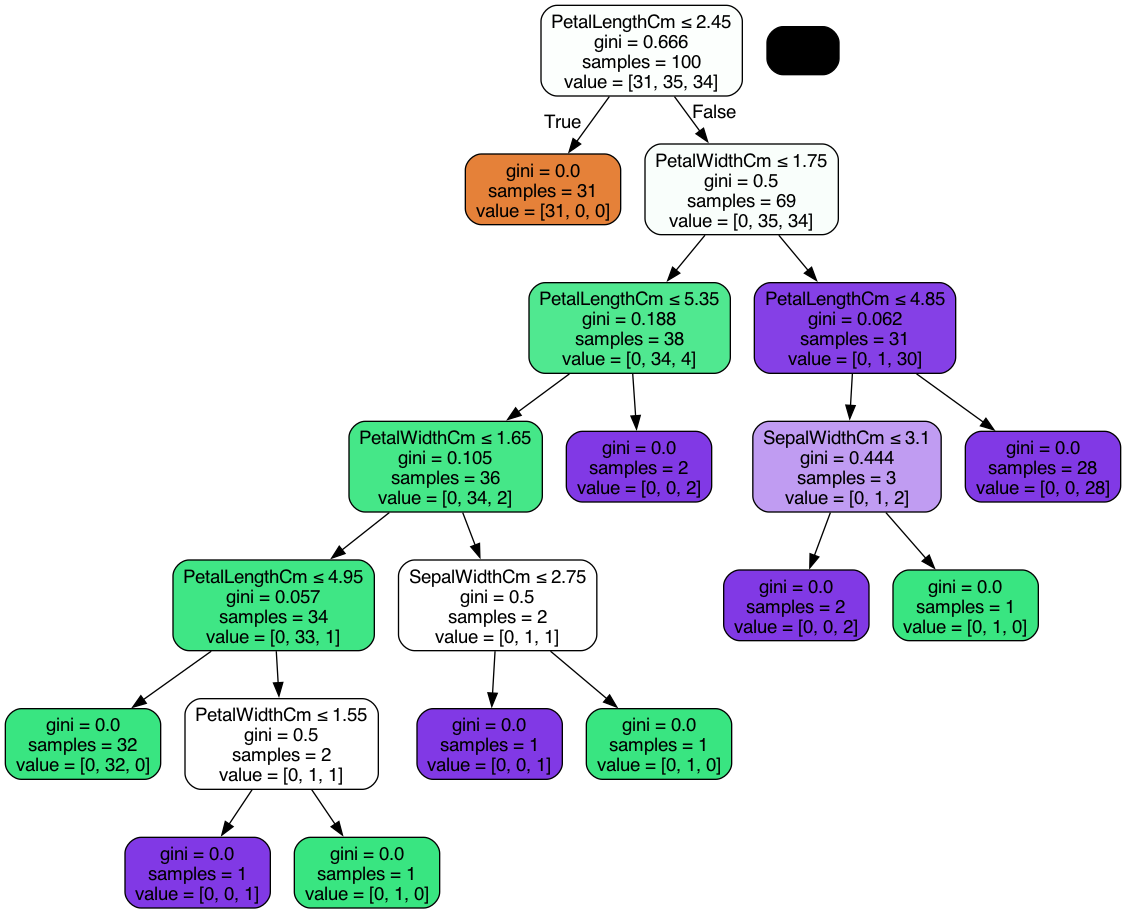

In [ ]:
# Tree using DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=X_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())